# Recommendations with IBM
## 1. Exploratory Data Analysis
This notebook is the first one in the Recommendations with IBM project. In this notebook I take a look at the data before jumping in to the recomendation functions.
In this project I am using IBM data. We are going to use two data files: 

* **User item interaction data:** This data set consists of three columns: article id, article title and user email. We are going to use user email column as user id. This data is stored in user-item-interactions.csv
* **Article content data:** This data set consists of five columns. First column includes the actual document data. Second column includes description of the article. Third column includes the name of the article. Fourth column includes docuement status live or not and the last column includes article id.  

We will take a look at each data set in this notebook. 


In [36]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [37]:
#reading data files
df = pd.read_csv('user-item-interactions.csv')
df_content = pd.read_csv('articles_community.csv')

#deleting unnecessary columns
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the interactions data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [38]:
#Number of interactions
print('Number of interactions is: {}'.format(df.shape[0]))

Number of interactions is: 45993


In [39]:
#content data
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


In [40]:
#Number of rows in content data
print("There are {} rows in content data".format(df_content.shape[0]))

There are 1056 rows in content data


In [41]:
#emails can identify users. We can find number of articles per each user by grouping df according to emails
df.groupby('email').count().head()


,article_id,title
email,,
0000b6387a0366322d7fbfc6434af145adf7fed1,13,13
001055fc0bb67f71e8fa17002342b256a30254cd,4,4
00148e4911c7e04eeff8def7bbbdaf1c59c2c621,3,3
001a852ecbd6cc12ab77a785efa137b2646505fe,6,6
001fc95b90da5c3cb12c501d201a915e4f093290,2,2


In [55]:
#Lets take a look at the descriptive statistics
Number_of_users=df.groupby('email').count().shape[0]
median_val=df.groupby('email').count()['article_id'].median()
min_val=df.groupby('email').count()['article_id'].min()
max_val=df.groupby('email').count()['article_id'].max()

print("There are {} unique users in the data \nEach user  interacted at least {} article\n50% of individuals interact with {} number of articles or fewer \nThe maximum number of user-article interactions by any one user is {}".
      format(Number_of_users,min_val,median_val,max_val))

There are 5148 unique users in the data 
Each user  interacted at least 1 article
50% of individuals interact with 3.0 number of articles or fewer 
The maximum number of user-article interactions by any one user is 364


(0, 850)

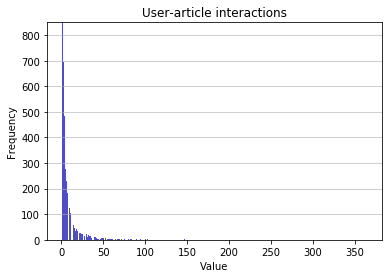

In [43]:
#draw a histogram to see the distribution of the interactions
n, bins, patches = plt.hist(x=df.groupby('email').count()['article_id'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('User-article interactions')
plt.ylim((0,850))

As we can see from the histogram, Although there are some extereme points, most of the users interacts arount 1 to 10 items. 

In [48]:
#We can also examine how many users have interacted with each article
df.groupby('article_id').count().head()

,title,email
article_id,,
0.0,14,14
2.0,58,58
4.0,13,13
8.0,85,85
9.0,10,10


In [51]:
#Lets take a look at the descriptive statistics
Number_of_articles=df.groupby('article_id').count().shape[0]
median_val=df.groupby('article_id').count()['title'].median()
min_val=df.groupby('article_id').count()['title'].min()
max_val=df.groupby('article_id').count()['title'].max()

print("There are {} unique articles in the data \nEach article interacted at least {} user \n50% of articles interact with {} number of users or fewer \nThe maximum number of user-article interactions by any one user is {}".
      format(Number_of_articles,min_val,median_val,max_val))

There are 714 unique articles in the data 
Each article interacted at least 1 user 
50% of articles interact with 25.0 number of users or fewer 
The maximum number of user-article interactions by any one user is 937


In [44]:
#Lets take a look at content data
#First check if there is any duplicates in this data according to article id

df_content.duplicated(subset='article_id',keep='first')

#.duplicate method gives as a bunch of trues ad falses. True corresponds duplicates
#as we wanted to keep one of the duplicated we mentoned to keep first one.

0       False
1       False
2       False
3       False
4       False
        ...  
1051    False
1052    False
1053    False
1054    False
1055    False
Length: 1056, dtype: bool

In [45]:
# Lets see the duplicate articles
df_content[df_content.duplicated(subset='article_id',keep='first')]

,doc_body,doc_description,doc_full_name,doc_status,article_id
365,Follow Sign in / Sign up Home About Insight Da...,During the seven-week Insight Data Engineering...,Graph-based machine learning,Live,50
692,Homepage Follow Sign in / Sign up Homepage * H...,One of the earliest documented catalogs was co...,How smart catalogs can turn the big data flood...,Live,221
761,Homepage Follow Sign in Get started Homepage *...,Today’s world of data science leverages data f...,Using Apache Spark as a parallel processing fr...,Live,398
970,This video shows you how to construct queries ...,This video shows you how to construct queries ...,Use the Primary Index,Live,577
971,Homepage Follow Sign in Get started * Home\r\n...,"If you are like most data scientists, you are ...",Self-service data preparation with IBM Data Re...,Live,232


In [46]:
# we can get the indexes of the duplicates and drop them from the original data ser
duplicate_row_index=df_content[df_content.duplicated(subset='article_id',keep='first')].index
print(duplicate_row_index)

Int64Index([365, 692, 761, 970, 971], dtype='int64')


In [47]:
#we can drop the duplicated rows
df_content=df_content.drop(duplicate_row_index,axis=0)
df_content.shape[0]

1051

We are going to change the email column as user_id to make it easier to work with

In [56]:
def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5
